In [ ]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv("/content/drive/MyDrive/Telco-Customer-Churn.csv")

print(df.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [ ]:
# Data Cleaning

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# tenure (how long customers stay).
print(df[["tenure", "MonthlyCharges","TotalCharges"]].describe())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


In [ ]:
# churn customers counts

print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
# Gender

print(df["gender"].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64


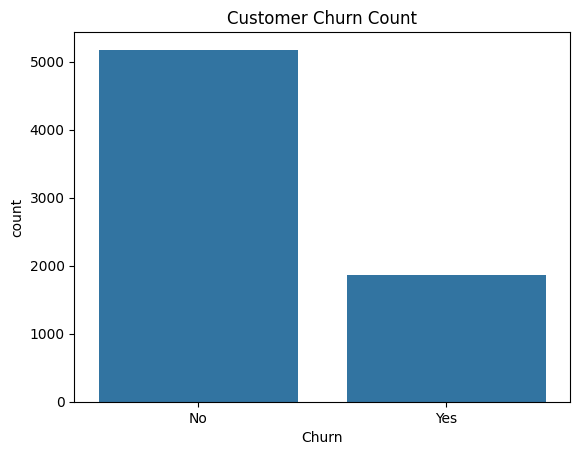

In [ ]:
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Count")
plt.show()

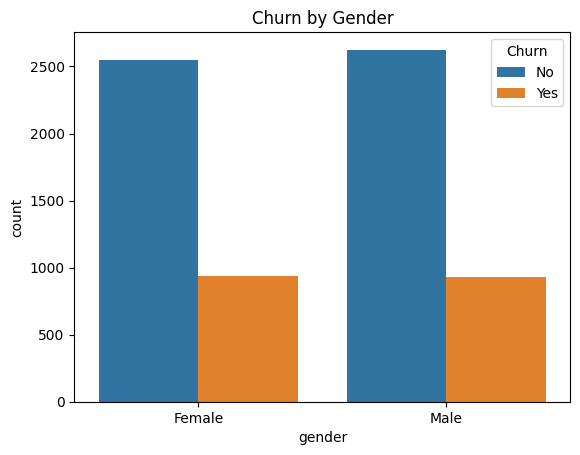

In [ ]:
# Churn distribution by gender
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Churn by Gender")
plt.show()
# Male and Female customers churn at almost the same rate which means gender does not strongly affect the churn.

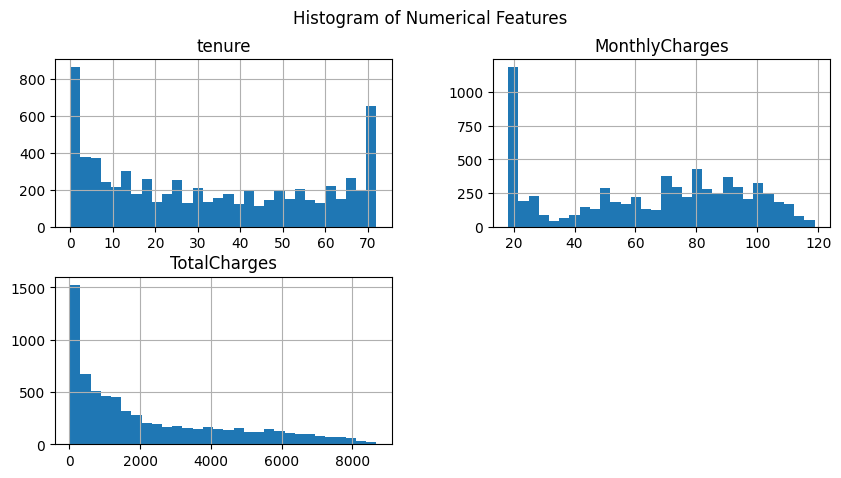

In [ ]:
# Histogram
df[["tenure", "MonthlyCharges", "TotalCharges"]].hist(bins=30, figsize=(10,5))
plt.suptitle("Histogram of Numerical Features")
plt.show()

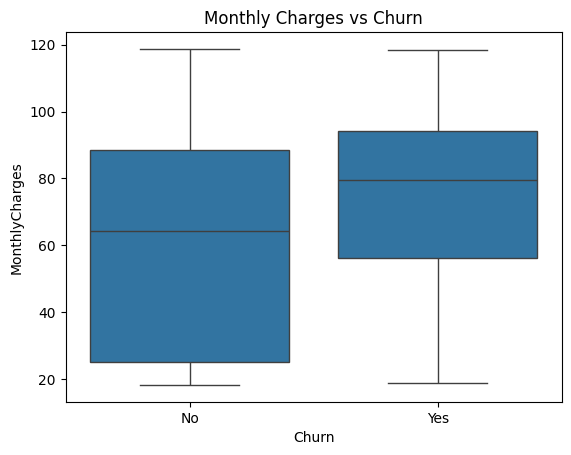

In [ ]:
# Monthly Charges vs Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

# this boxplot tell us that Customers who churn generally have higher monthly charges.

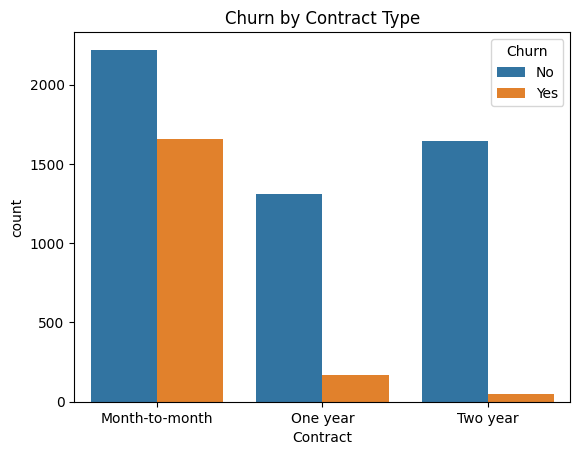

In [ ]:
# Contract Type vs Churn
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()

# this indicate that the customer who choose Month-to-month contracts have the highest churn rate.
# and the customer who go for 1-year or 2-year contracts are more loyal.

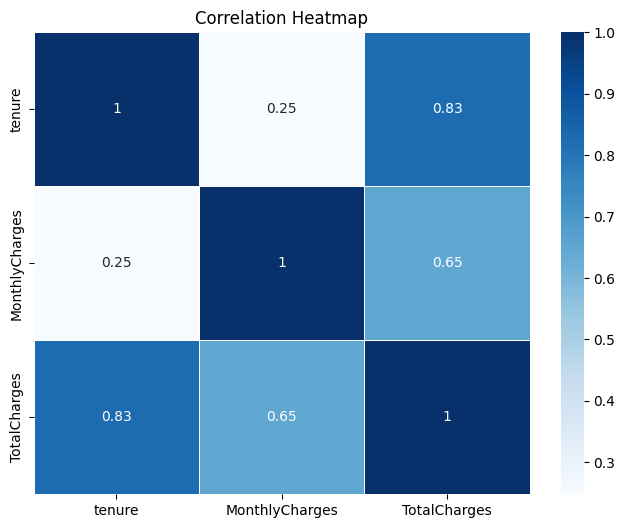

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(),
            annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
